# cleanup code for the figure 2
this notebook creates C/N figure for showing filtering of low C/N of hetrotrophs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", context='poster')
import math

In [2]:
import datashader as ds, datashader.transfer_functions as tf
import dask.dataframe as dd

In [3]:
%load_ext autoreload
%autoreload 2


In [4]:
plot_width  = int(900)
plot_height  = plot_width

#plot_height = int(plot_width*7.0/12)

In [5]:
plot_width  = int(900)
plot_height  = plot_width

#plot_height = int(plot_width*7.0/12)
#background = "black"
background=None

from functools import partial
from datashader.utils import export_image
from datashader.colors import colormap_select, Greys9

export = partial(export_image, background = background, export_path="export")
cm = partial(colormap_select, reverse=(background!="black"))

In [6]:
import sys
sys.path.append('..')
from model_equations_separate_NC_store_numba import *


In [7]:
morder = ['EXOENZYME','OVERFLOW',   'ROS','MIXOTROPH',]#'MIN', ]
media_order = ['lowN', 'pro99']
mpalette = [ '#426b69', '#9b7874', '#b191ff', '#84dcc6',]# '#d6d4a0',]
sns.color_palette(mpalette)

[(0.25882352941176473, 0.4196078431372549, 0.4117647058823529),
 (0.6078431372549019, 0.47058823529411764, 0.4549019607843137),
 (0.6941176470588235, 0.5686274509803921, 1.0),
 (0.5176470588235295, 0.8627450980392157, 0.7764705882352941)]

In [8]:
morder1 = morder[:-1]
mpalette1 = mpalette[:-1]

In [9]:
gorder = [ 'Strong', 'Sustained', 'Inhibited', 'Weak', 'Neutral',   'Other']
gpalette = sns.color_palette('Set2', n_colors=4).as_hex() + ['black', 'lightgrey']
gpalette = ['#882255', '#CC6677', '#332288', 
             '#44AA99','#88CCEE',
            '#D0CFCA',  ]

sns.color_palette(gpalette)

[(0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.8, 0.4, 0.4666666666666667),
 (0.2, 0.13333333333333333, 0.5333333333333333),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.5333333333333333, 0.8, 0.9333333333333333),
 (0.8156862745098039, 0.8117647058823529, 0.792156862745098)]

In [10]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [PCOLOR, PCOLOR_light, HCOLOR, HCOLOR_light, SPCOLOR, SHCOLOR,DONCOLOR, RDONCOLOR, DINCOLOR]
ccnorder = ['Bp', 'Np', 'Bh','Nh',  'ABp', 'ABh', 'DON', 'RDON', 'DIN', ]
cccpalette = [PCOLOR, PCOLOR_light, HCOLOR, HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
cccorder = ['Bp[C]', 'Cp', 'Bh[C]', 'Ch', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


[(0.6, 0.8, 0.6),
 (0.6666666666666666, 0.8352941176470589, 0.6666666666666666),
 (1.0, 0.7725490196078432, 0.5607843137254902),
 (1.0, 0.8235294117647058, 0.6627450980392157),
 (0.19607843137254902, 0.3843137254901961, 0.19607843137254902),
 (1.0, 0.6627450980392157, 0.5607843137254902),
 (0.4470588235294118, 0.5215686274509804, 0.7176470588235294),
 (0.0, 0.0, 0.0),
 (0.7333333333333333, 0.8549019607843137, 1.0),
 (0.6, 0.8, 0.6),
 (0.6666666666666666, 0.8352941176470589, 0.6666666666666666),
 (1.0, 0.7725490196078432, 0.5607843137254902),
 (1.0, 0.8235294117647058, 0.6627450980392157),
 (0.19607843137254902, 0.3843137254901961, 0.19607843137254902),
 (1.0, 0.6627450980392157, 0.5607843137254902),
 (0.8, 0.4, 0.4),
 (0.0, 0.0, 0.0),
 (1.0, 0.615686274509804, 0.6431372549019608)]

In [11]:
sns.color_palette('summer')

[(0.1411764705882353, 0.5705882352941176, 0.4),
 (0.28627450980392155, 0.6431372549019607, 0.4),
 (0.42745098039215684, 0.7137254901960784, 0.4),
 (0.5725490196078431, 0.7862745098039216, 0.4),
 (0.7137254901960784, 0.8568627450980393, 0.4),
 (0.8588235294117647, 0.9294117647058824, 0.4)]

In [12]:
sns.palettes.QUAL_PALETTES

['tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'Set1',
 'Set2',
 'Set3',
 'Accent',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Dark2',
 'deep',
 'deep6',
 'muted',
 'muted6',
 'pastel',
 'pastel6',
 'bright',
 'bright6',
 'dark',
 'dark6',
 'colorblind',
 'colorblind6']

In [13]:
ccnorder = ['Bp', 'Np','Bh',  'Nh', 'DIN','DON',  'RDON', ]
ccnpalette = [PCOLOR, PCOLOR_light, HCOLOR, HCOLOR_light,DINCOLOR, DONCOLOR, RDONCOLOR, ]

#Hex Codes: #262842, #293961, #2C497F, #8897BD, #E3E4FA
#Hex Codes: #49593C, #945C39, #DF5F35, #EF9E84, #FFE3D1
#Hex Codes: #5E1525, #C74F29, #E99E46, #B6C38D, #828144
ccnpalette = ['#2F6755', '#98A69A', '#7d5c54', '#E7BB96', '#262842', '#2C497F', '#8897BD']
#ccnpalette = ['#828144', '#B6C38D', '#E99E46', '#E7BB96', '#262842', '#2C497F', '#8897BD']
cccorder = ['Bp[C]', 'Cp','Bh[C]',  'Ch', 'DIC','DOC',  'RDOC', ]
cccpalette = [PCOLOR, PCOLOR_light, HCOLOR, HCOLOR_light,DICCOLOR, DOCCOLOR, RDOCCOLOR, ]
#Hex Codes: #49593C, #945C39, #DF5F35, #EF9E84, #FFE3D1
cccpalette = ['#2F6755', '#98A69A', '#7d5c54', '#E7BB96', '#DF5F35', '#EF9E84', '#ffd8d1']

sns.color_palette(cccpalette)

[(0.1843137254901961, 0.403921568627451, 0.3333333333333333),
 (0.596078431372549, 0.6509803921568628, 0.6039215686274509),
 (0.49019607843137253, 0.3607843137254902, 0.32941176470588235),
 (0.9058823529411765, 0.7333333333333333, 0.5882352941176471),
 (0.8745098039215686, 0.37254901960784315, 0.20784313725490197),
 (0.9372549019607843, 0.6196078431372549, 0.5176470588235295),
 (1.0, 0.8470588235294118, 0.8196078431372549)]

In [14]:

 
sns.color_palette([PCOLOR, HCOLOR, PCOLOR_light, HCOLOR_light] )


[(0.6, 0.8, 0.6),
 (1.0, 0.7725490196078432, 0.5607843137254902),
 (0.6666666666666666, 0.8352941176470589, 0.6666666666666666),
 (1.0, 0.8235294117647058, 0.6627450980392157)]

In [15]:
refdf = pd.read_excel('../ML_model/reference_final.xlsx')

In [16]:
dpath = '/fast_data/Osnat/RECYCLE_MODEL/results/shgo2/out'
dpath = '../results'
dpath = '../results/final/het'

In [17]:
fnames_predicted_classes = [
    'predicted_classes_monte_add_het_clean.csv.gz',
    'predicted_classes_monte_het_add_100per_vpro_ROS.csv.gz',
]

In [18]:
fnames_df = [
    '../results/monte_add_het_df.csv.gz',
    '../results/multi/add/het_100per_vpro/monte_het_add_100per_vpro_ROS_df.csv.gz'
]

In [19]:
sum_df = pd.concat([pd.read_csv( f) for f in fnames_df], ignore_index=True)

In [43]:
sum_df.columns

Index(['Bp', 'Np', 'Cp', 'Bh', 'Nh', 'Ch', 'DON', 'RDON', 'DIN', 'DOC', 'RDOC',
       'DIC', 'ROS', 't', 'day', 'gross_uptakeINp', 'gross_uptakeINh',
       'gross_uptakeONp', 'gross_uptakeONh', 'gross_uptakeICp',
       'gross_uptakeICh', 'gross_uptakeOCp', 'gross_uptakeOCh', 'uptakeNp',
       'uptakeNh', 'uptakeCp', 'uptakeCh', 'QCp', 'QCh', 'biosynthesisNp',
       'biosynthesisNh', 'respirationCp', 'respirationCh',
       'biomass_breakdownCp', 'biomass_breakdownCh', 'overflowNp',
       'overflowNh', 'overflowCp', 'overflowCh', 'Bp[C]', 'Bptotal[N]',
       'Bptotal[C]', 'Bh[C]', 'Bhtotal[N]', 'Bhtotal[C]', 'run_id',
       'ROSproductionp', 'ROSproductionh', 'ROSlossp', 'ROSlossh',
       'deathbiomassNp', 'deathbiomassNh', 'deathstoreNp', 'deathstoreNh',
       'deathstoreCp', 'deathstoreCh', 'DON2DIN_exop', 'DON2DIN_exoh',
       'DON2DIN', 'additionalLossRatep', 'additionalLossRateh', 'regNp',
       'regNh', 'regCp', 'regCh', 'deathC_DOCp', 'deathC_DOCh', 'deathN_DONp',
   

In [64]:
vpro_df = sum_df.loc[:, ['run_id']]
vpro_df

run_id
0        monteadd_EXOENZYME_41_monte_vpro_23_76_EXOENZY...
1        monteadd_EXOENZYME_41_monte_vpro_23_76_EXOENZY...
2        monteadd_EXOENZYME_41_monte_vpro_23_76_EXOENZY...
3        monteadd_EXOENZYME_41_monte_vpro_23_76_EXOENZY...
4        monteadd_EXOENZYME_41_monte_vpro_23_76_EXOENZY...
...                                                    ...
2431667  monte_rerun_het_add_vpro_19_33_ROS_C0_788_mont...
2431668  monte_rerun_het_add_vpro_19_33_ROS_C0_788_mont...
2431669  monte_rerun_het_add_vpro_19_33_ROS_C0_788_mont...
2431670  monte_rerun_het_add_vpro_19_33_ROS_C0_788_mont...
2431671  monte_rerun_het_add_vpro_19_33_ROS_C0_788_mont...

[2431672 rows x 1 columns]

In [65]:
vpro_df = vpro_df.drop_duplicates().copy()

In [66]:
vpro_df[['idx', 'media', 'which', 'model', 'hash']] = vpro_df.run_id.str.rsplit('_', n=4, expand=True)

# TODO
vpro_df['VPRO'] = vpro_df.idx.str.replace(r'.*(vpro.*)_\d+',r'\1', regex=True)
vpro_df['VPRO'] = vpro_df.VPRO.str.replace(r'_monte_','', regex=False)


In [67]:
vpro_df.VPRO

0          vpro_23_76_EXOENZYME_C2_41
74          vpro_57_7_EXOENZYME_C2_71
148        vpro_49_10_EXOENZYME_C3_72
222        vpro_39_73_EXOENZYME_C2_81
296        vpro_75_68_EXOENZYME_C2_86
                      ...            
2431302         vpro_19_33_ROS_C0_283
2431376         vpro_19_33_ROS_C0_858
2431450         vpro_19_33_ROS_C0_435
2431524         vpro_19_33_ROS_C0_999
2431598         vpro_19_33_ROS_C0_788
Name: VPRO, Length: 32881, dtype: object

In [68]:
example_vpro = 'vpro_3_14_37_OVERFLOW-ROS-EXOENZYME__40_OVERFLOW-ROS-EXOENZYME'
example_vpro = 'vpro_19_33_ROS_C0_1023'

In [69]:
runids = vpro_df.loc[vpro_df.VPRO.isin([example_vpro]), 'run_id']

In [70]:
runids.nunique()

169

In [76]:
df = sum_df.loc[sum_df.run_id.isin(runids) ].copy()

In [79]:
df['C2N'] = 'ok'
problematic_C2N_runids = df.loc[
    df['Bhtotal[C]'].ge(5) & 
    df['QCh'].le(3.5)& 
    df['day'].ge(10)
].run_id.unique()

df.loc[df.run_id.isin(problematic_C2N_runids), 'C2N'] = 'problem'

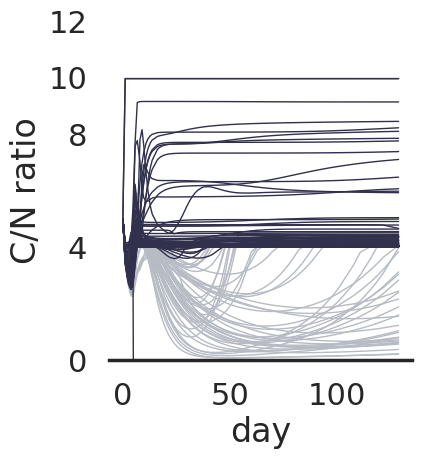

In [81]:
#runids = min_mse_df.loc[min_mse_df.Mode.isin(['Monte']),'run_id'].sample(500, ignore_index=True)
g = sns.relplot(
    data=df,
    x='day',
    y='QCh',
    kind='line', lw=1,
    hue='C2N', hue_order=['problem', 'ok'], palette=['#B6BBC4', '#31304D'],
    estimator=None, units='run_id', 
    #col='model', col_order=morder, #col_wrap=3,
    legend=False,
    #aspect=3, height=3,
    #facet_kws=dict(margin_titles=True)

#).set_titles(row_template='{row_name}', col_template='{col_name}').set(ylabel='', )
).set_titles(row_template='{row_name}', col_template='').set(ylabel='', )
#g.set(ylabel='PRO (uM C)')
#plt.suptitle('Montecarlo')
#plt.subplots_adjust(hspace=0.1, wspace=0.1)
g.set(ylim=(0, 12), yticks=[0,4,8,10,12])
g.set(ylabel='C/N ratio')
    
sns.despine(left=True)
#g.set(yscale='log', ylim=(5, 1500))
plt.show()

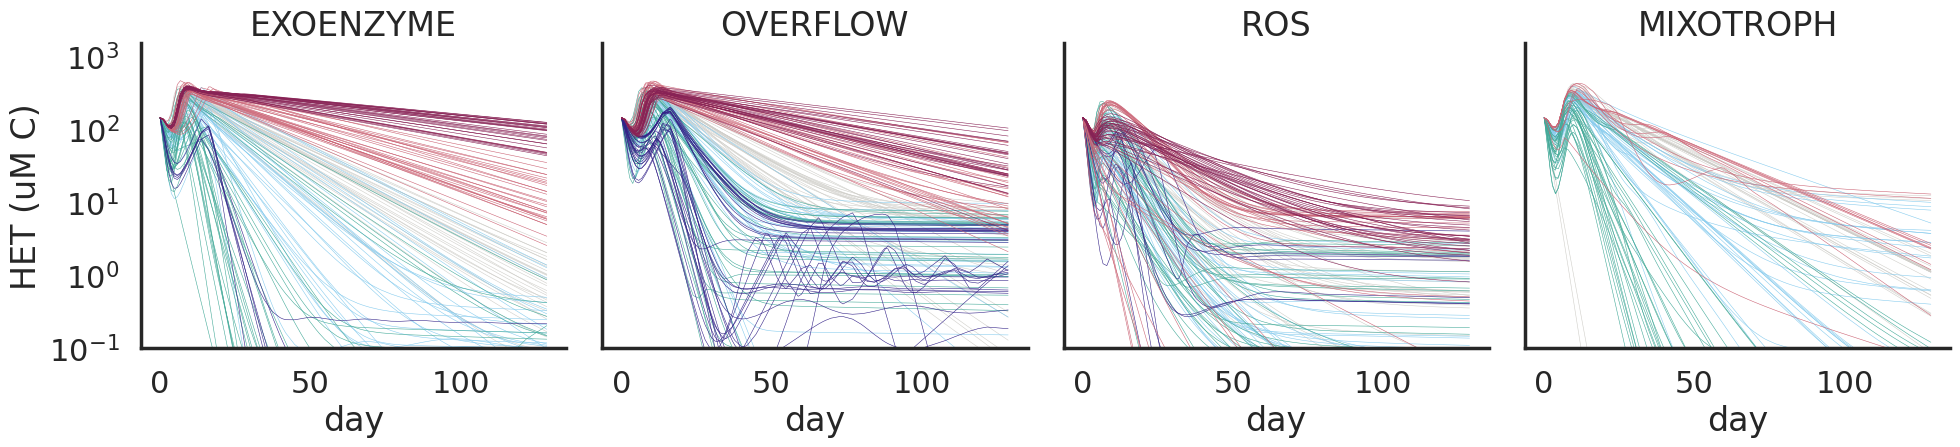

In [135]:
#runids = min_mse_df.loc[min_mse_df.Mode.isin(['Monte']),'run_id'].sample(500, ignore_index=True)
g = sns.relplot(
    data=df.loc[df.run_id.isin(runids)],
    x='day',
    y='Bhtotal[C]',
    hue='y_pred', hue_order=reversed(gorder),
    kind='line', lw=0.4,
    estimator=None, units='run_id', palette=reversed(gpalette),
    col='model', col_order=morder, #col_wrap=3,
    legend=False,
        #aspect=1, height=3,
    #facet_kws=dict(margin_titles=True)

).set_titles(row_template='{row_name}', col_template='{col_name}').set(ylabel='', )
g.set(ylabel='HET (uM C)')
#plt.suptitle('Montecarlo')
#plt.subplots_adjust(hspace=0.1, wspace=0.1)
#g.set(ylim=(0, 1000))

g.set(yscale='log', ylim=(1e-1, 1500))
plt.show()

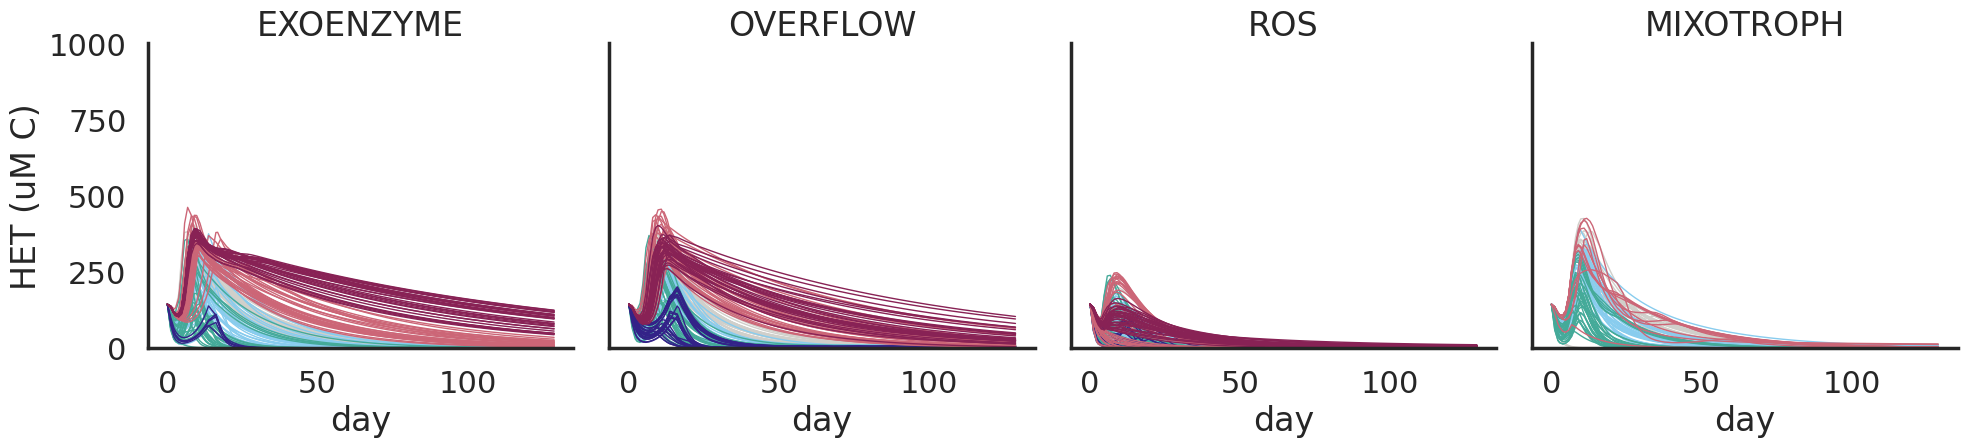

In [136]:
#runids = min_mse_df.loc[min_mse_df.Mode.isin(['Monte']),'run_id'].sample(500, ignore_index=True)
g = sns.relplot(
    data=df.loc[df.run_id.isin(runids)],
    x='day',
    y='Bhtotal[C]',
    hue='y_pred', hue_order=reversed(gorder),
    kind='line', lw=1,
    estimator=None, units='run_id', palette=reversed(gpalette),
    col='model', col_order=morder, #col_wrap=3,
    legend=False,
        #aspect=1, height=3,
    #facet_kws=dict(margin_titles=True)

).set_titles(row_template='{row_name}', col_template='{col_name}').set(ylabel='', )
g.set(ylabel='HET (uM C)')
#plt.suptitle('Montecarlo')
#plt.subplots_adjust(hspace=0.1, wspace=0.1)
g.set(ylim=(0, 1000))

#g.set(yscale='log', ylim=(1e-1, 1500))
plt.show()

In [137]:
gorder

['Strong', 'Sustained', 'Inhibited', 'Weak', 'Neutral', 'Other']

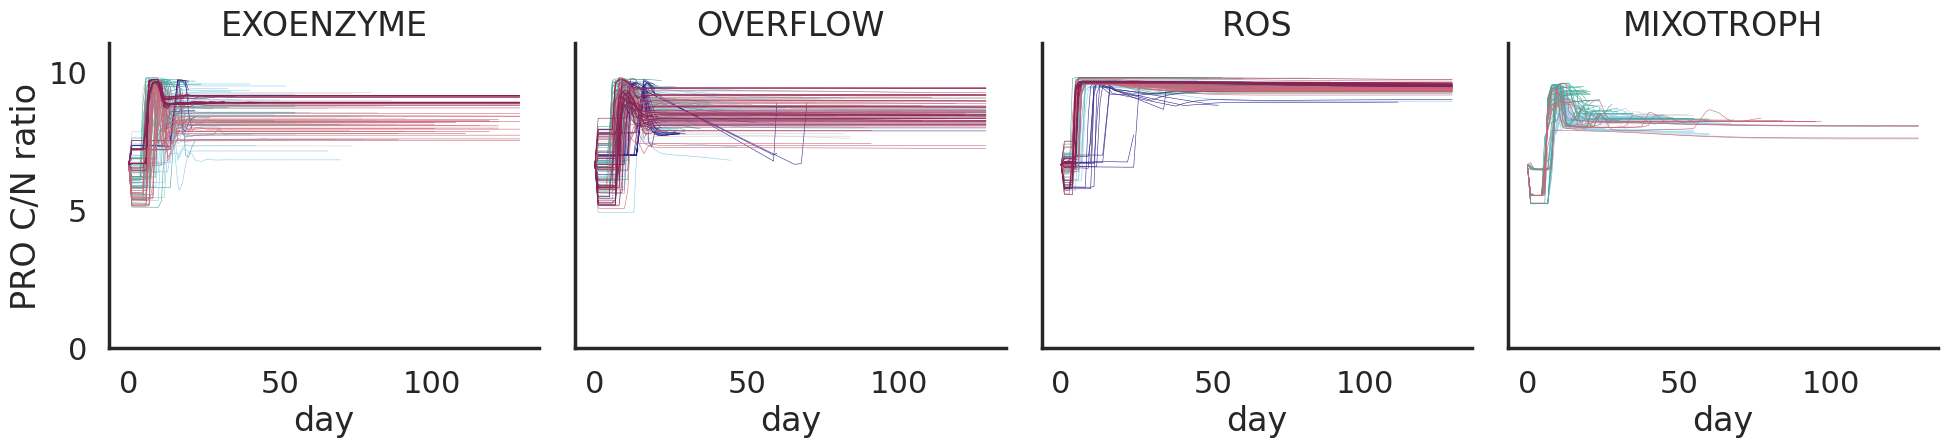

In [138]:
#runids = min_mse_df.loc[min_mse_df.Mode.isin(['Monte']),'run_id'].sample(500, ignore_index=True)
g = sns.relplot(
    data=df.loc[df.run_id.isin(runids) & df['Bptotal[C]'].ge(5)],
    x='day',
    y='QCp',
    hue='y_pred', hue_order=reversed(gorder),
    kind='line', lw=0.4,
    estimator=None, units='run_id', palette=reversed(gpalette),
    col='model', col_order=morder, #col_wrap=3,
    legend=False,
        #aspect=1, height=3,
    #facet_kws=dict(margin_titles=True)

).set_titles(row_template='{row_name}', col_template='{col_name}').set(ylabel='', )
g.set(ylabel='PRO C/N ratio')
#plt.suptitle('Montecarlo')
#plt.subplots_adjust(hspace=0.1, wspace=0.1)
g.set(ylim=(0, 11))

#g.set(yscale='log', ylim=(1e-1, 1500))
plt.show()

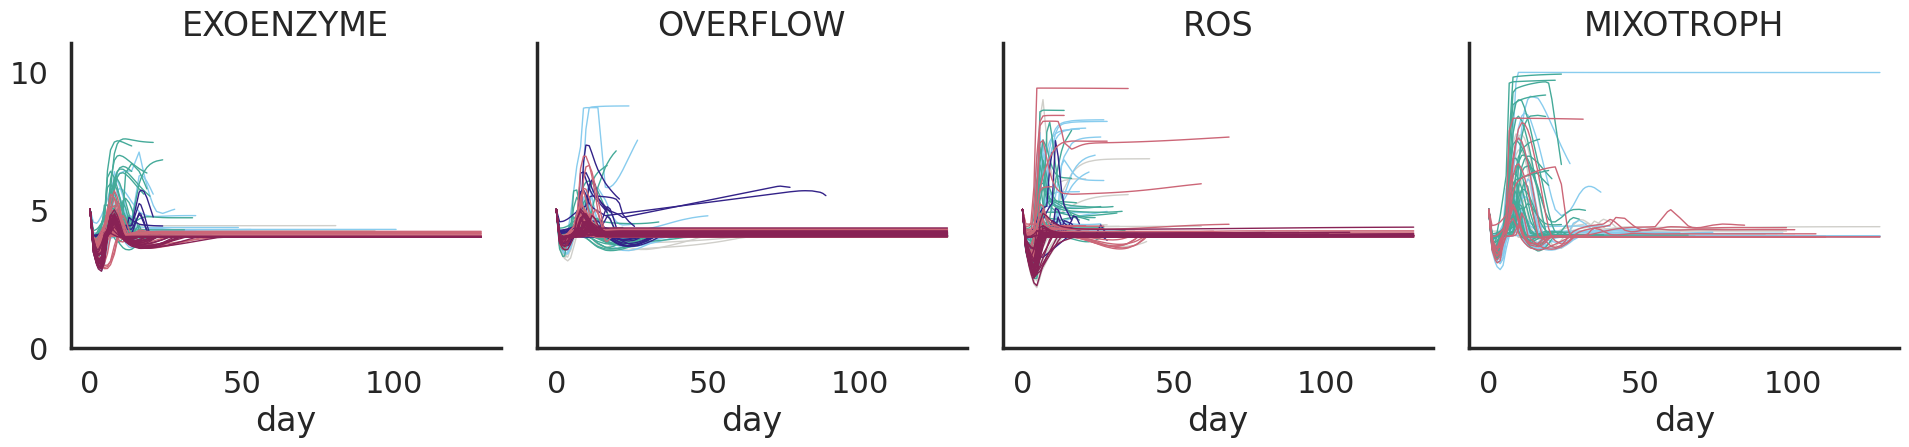

In [139]:
#runids = min_mse_df.loc[min_mse_df.Mode.isin(['Monte']),'run_id'].sample(500, ignore_index=True)
g = sns.relplot(
    data=df.loc[df.run_id.isin(runids)& df['Bhtotal[C]'].ge(5)],
    x='day',
    y='QCh',
    hue='y_pred', hue_order=reversed(gorder),
    kind='line', lw=1,
    estimator=None, units='run_id', palette=reversed(gpalette),
    col='model', col_order=morder, #col_wrap=3,
    legend=False,
        #aspect=1, height=3,
    #facet_kws=dict(margin_titles=True)

).set_titles(row_template='{row_name}', col_template='{col_name}').set(ylabel='', )
#g.set(ylabel='umol C/L')
#plt.suptitle('Montecarlo')
#plt.subplots_adjust(hspace=0.1, wspace=0.1)
#g.set(ylim=(0, 20))
g.set(ylim=(0, 11))

#g.set(yscale='log', ylim=(1e-1, 1500))
plt.show()

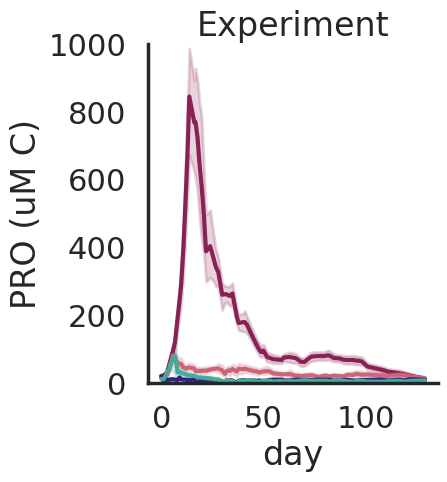

In [140]:
g = sns.relplot(
    data=refdf,
    x='day',
    y='ref_Bp[C]',
    hue='Group', hue_order=gorder,
    kind='line', #lw=0.4,
    #estimator=None, units='Sample', 
    palette=gpalette,
    #col='model', col_order=morder, #col_wrap=3,
    legend=False,
        #aspect=1, height=3,
    #facet_kws=dict(margin_titles=True)

).set_titles(row_template='{row_name}', col_template='{col_name}').set(ylabel='', )
g.set(ylabel='PRO (uM C)')
plt.title('Experiment')
#plt.suptitle('Montecarlo')
#plt.subplots_adjust(hspace=0.1, wspace=0.1)
#g.set(yscale='log', ylim=(1e-1, 1500))

g.set(ylim=(0, 1000))
plt.show()

In [149]:
gorder_a = ['Strong', 'Sustained', 'Inhibited', 'Weak', ]


['Strong', 'Sustained', 'Inhibited', 'Weak', 'Neutral', 'Other']

In [151]:
refdf

train_Group Sample  id        full name   Group Experiment         day  \
0         Axenic    1A0   1           Axenic  Axenic       10CC    0.000000   
1         Axenic    1A0   1           Axenic  Axenic       10CC    1.081944   
2         Axenic    1A0   1           Axenic  Axenic       10CC    2.164583   
3         Axenic    1A0   1           Axenic  Axenic       10CC    2.747222   
4         Axenic    1A0   1           Axenic  Axenic       10CC    3.754167   
...          ...    ...  ..              ...     ...        ...         ...   
2881        Weak   11C0  11  Roseovarius 5C3    Weak       10CC  110.943750   
2882        Weak   11C0  11  Roseovarius 5C3    Weak       10CC  115.845833   
2883        Weak   11C0  11  Roseovarius 5C3    Weak       10CC  118.788889   
2884        Weak   11C0  11  Roseovarius 5C3    Weak       10CC  121.777778   
2885        Weak   11C0  11  Roseovarius 5C3    Weak       10CC  128.767361   

      ref_Bp[N]  ref_Bp[C]           t  
0      2.860934  18.953691         0.0  
1      0.797310   5.282176     93480.0  
2      3.728595  24.701941    187020.0  
3      5.323214  35.266293    237360.0  
4      7.175786  47.539584    324360.0  
...         ...        ...         ...  
2881   0.117251   0.776791   9585540.0  
2882   0.445555   2.951804  10009080.0  
2883   0.891111   5.903609  10263360.0  
2884   1.055263   6.991115  10521600.0  
2885   1.336666   8.855413  11125500.0  

[2886 rows x 10 columns]

In [176]:
refdf['full name_'] = refdf['full name'].str.replace(r' ([^ ]+)$', r'\n\1', regex=True)
refdf['Group_'] = pd.Categorical(refdf['Group'], categories=gorder, ordered=True )
reforder = refdf.loc[~refdf.Group.isin(['Axenic'])].drop_duplicates('full name_').sort_values(by='Group_')['full name_']

In [177]:
reforder.shape

(12,)

In [178]:
    
refdf['ref_Bp[C]_clip'] = refdf['ref_Bp[C]'].clip(6)

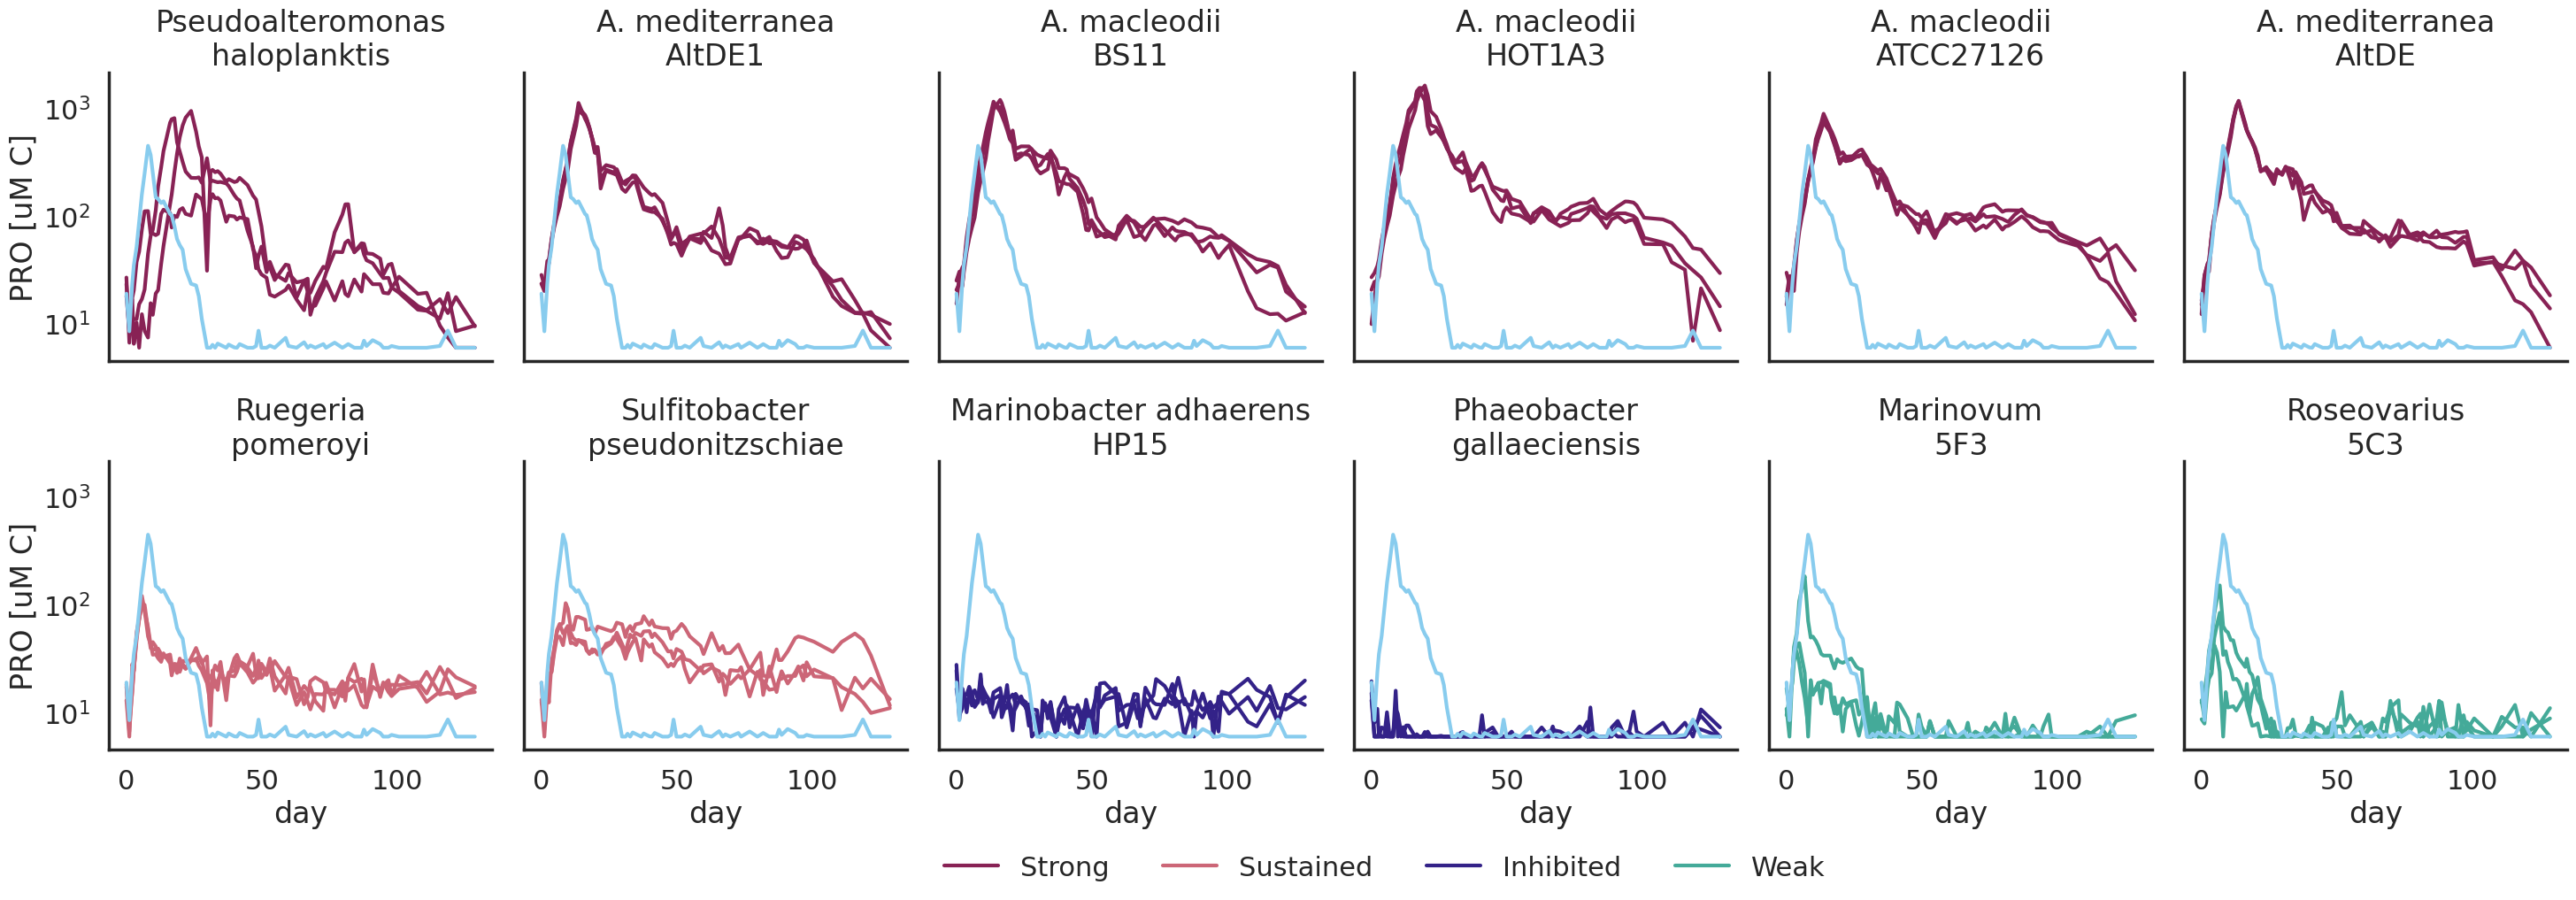

In [188]:
sns.set_context('poster')# , font_scale=1.3)
g = sns.relplot(
    data=refdf,
    x='day',
    y='ref_Bp[C]_clip',
    hue='Group', hue_order=gorder[:-2],
    kind='line', #lw=0.4,
    estimator=None, units='Sample', 
    col='full name_', col_order=reforder, col_wrap=6,
    palette=gpalette[:-2],

).set_titles(row_template='{row_name}', col_template='{col_name}').set(ylabel='', )
for (col_val), ax in g.axes_dict.items():        
    sns.lineplot(
        data=refdf.loc[refdf.Group.isin(['Axenic'])],
        x='day',
        y='ref_Bp[C]_clip',
        #lw=1, 
        errorbar=None,
        color=gpalette[-2],
        legend=False,
        ax=ax,        
        
    )
g.set(ylabel='PRO [uM C]')
#plt.title('Experiment')
#plt.suptitle('Montecarlo')
#plt.subplots_adjust(hspace=0.1, wspace=0.1)
g.set(yscale='log') #, ylim=(1e-1, 1500))
sns.move_legend(
    g, "lower center",
    bbox_to_anchor=(.5, -0.05), 
    ncol=4, title=None, frameon=False,
)
#g.set(ylim=(0, 1000))
plt.show()

In [141]:
runids.nunique()

599

In [142]:
sample_df = df.loc[df.run_id.isin(runids)]
#sample_df = sample_df.merge(df_predicted_classes, on=['run_id', 'model'], how='left')
sample_df

model   Phase                            VPRO  Versatile  \
35520    EXOENZYME     add      vpro_13_69_EXOENZYME_C1_40       True   
35521    EXOENZYME     add      vpro_13_69_EXOENZYME_C1_40       True   
35522    EXOENZYME     add      vpro_13_69_EXOENZYME_C1_40       True   
35523    EXOENZYME     add      vpro_13_69_EXOENZYME_C1_40       True   
35524    EXOENZYME     add      vpro_13_69_EXOENZYME_C1_40       True   
...            ...     ...                             ...        ...   
8029365        ROS  round2  vpro_2_19_33_ROS_C0_962_68_ROS       True   
8029366        ROS  round2  vpro_2_19_33_ROS_C0_962_68_ROS       True   
8029367        ROS  round2  vpro_2_19_33_ROS_C0_962_68_ROS       True   
8029368        ROS  round2  vpro_2_19_33_ROS_C0_962_68_ROS       True   
8029369        ROS  round2  vpro_2_19_33_ROS_C0_962_68_ROS       True   

                                                    run_id   y_pred Sample  \
35520    monte_rerun_het_add_vpro_13_69_EXOENZYME_C1_40...  Neutral    1A0   
35521    monte_rerun_het_add_vpro_13_69_EXOENZYME_C1_40...  Neutral    1A0   
35522    monte_rerun_het_add_vpro_13_69_EXOENZYME_C1_40...  Neutral    1A0   
35523    monte_rerun_het_add_vpro_13_69_EXOENZYME_C1_40...  Neutral    1A0   
35524    monte_rerun_het_add_vpro_13_69_EXOENZYME_C1_40...  Neutral    1A0   
...                                                    ...      ...    ...   
8029365  monte_rerun_het_round2_vpro_2_19_33_ROS_C0_962...    Other    NaN   
8029366  monte_rerun_het_round2_vpro_2_19_33_ROS_C0_962...    Other    NaN   
8029367  monte_rerun_het_round2_vpro_2_19_33_ROS_C0_962...    Other    NaN   
8029368  monte_rerun_het_round2_vpro_2_19_33_ROS_C0_962...    Other    NaN   
8029369  monte_rerun_het_round2_vpro_2_19_33_ROS_C0_962...    Other    NaN   

         max_prob        Bp        Np  ...  additionalLossRatep  \
35520    0.891071  0.892857  0.000000  ...         0.000000e+00   
35521    0.891071  1.257439  0.416631  ...         0.000000e+00   
35522    0.891071  2.231485  0.744108  ...         0.000000e+00   
35523    0.891071  3.040601  1.013918  ...         0.000000e+00   
35524    0.891071  5.189588  1.730135  ...         0.000000e+00   
...           ...       ...       ...  ...                  ...   
8029365  0.991891  1.024625  0.026479  ...         7.547110e-07   
8029366  0.991891  1.017672  0.026297  ...         7.532345e-07   
8029367  0.991891  1.013766  0.026188  ...         7.523907e-07   
8029368  0.991891  1.009949  0.026079  ...         7.515569e-07   
8029369  0.991891  1.001436  0.025824  ...         7.496680e-07   

         additionalLossRateh     regNp     regNh     regCp     regCh  \
35520           0.000000e+00  0.660377  0.333333  0.562500  0.833333   
35521           0.000000e+00  0.709136  0.000000  0.506275  1.000000   
35522           0.000000e+00  0.709317  0.000000  0.506055  1.000000   
35523           0.000000e+00  0.709276  0.000000  0.506105  1.000000   
35524           0.000000e+00  0.709037  0.000000  0.506395  1.000000   
...                      ...       ...       ...       ...       ...   
8029365         2.676204e-10  0.954944  0.015576  0.105510  0.993711   
8029366         2.670969e-10  0.954945  0.015613  0.105506  0.993696   
8029367         2.667976e-10  0.954951  0.015630  0.105495  0.993689   
8029368         2.665020e-10  0.954958  0.015643  0.105477  0.993684   
8029369         2.658322e-10  0.954983  0.015664  0.105423  0.993675   

         deathC_DOCp   deathC_DOCh   deathN_DONp   deathN_DONh  
35520       0.000029  5.796821e-05  4.331435e-06  1.159364e-05  
35521       0.000057  5.211459e-05  8.121260e-06  1.420959e-05  
35522       0.000101  4.255614e-05  1.443522e-05  1.275156e-05  
35523       0.000137  3.914697e-05  1.966931e-05  1.202983e-05  
35524       0.000234  3.631771e-05  3.356901e-05  1.087748e-05  
...              ...           ...           ...           ...  
8029365     0.000005  8.867607e-07  5.167138e-07  2.196184e-07  
8029366  

In [143]:
sample_df.run_id.nunique(), runids.nunique()

(599, 599)

In [144]:
sample_df.run_id.nunique(), runids.nunique()

(599, 599)

In [145]:
greenpalette = sns.light_palette(PCOLOR, n_colors=12 )[2:]
orangepalette = sns.light_palette(HCOLOR, n_colors=12 )[2:]


In [146]:
sample_df

model   Phase                            VPRO  Versatile  \
35520    EXOENZYME     add      vpro_13_69_EXOENZYME_C1_40       True   
35521    EXOENZYME     add      vpro_13_69_EXOENZYME_C1_40       True   
35522    EXOENZYME     add      vpro_13_69_EXOENZYME_C1_40       True   
35523    EXOENZYME     add      vpro_13_69_EXOENZYME_C1_40       True   
35524    EXOENZYME     add      vpro_13_69_EXOENZYME_C1_40       True   
...            ...     ...                             ...        ...   
8029365        ROS  round2  vpro_2_19_33_ROS_C0_962_68_ROS       True   
8029366        ROS  round2  vpro_2_19_33_ROS_C0_962_68_ROS       True   
8029367        ROS  round2  vpro_2_19_33_ROS_C0_962_68_ROS       True   
8029368        ROS  round2  vpro_2_19_33_ROS_C0_962_68_ROS       True   
8029369        ROS  round2  vpro_2_19_33_ROS_C0_962_68_ROS       True   

                                                    run_id   y_pred Sample  \
35520    monte_rerun_het_add_vpro_13_69_EXOENZYME_C1_40...  Neutral    1A0   
35521    monte_rerun_het_add_vpro_13_69_EXOENZYME_C1_40...  Neutral    1A0   
35522    monte_rerun_het_add_vpro_13_69_EXOENZYME_C1_40...  Neutral    1A0   
35523    monte_rerun_het_add_vpro_13_69_EXOENZYME_C1_40...  Neutral    1A0   
35524    monte_rerun_het_add_vpro_13_69_EXOENZYME_C1_40...  Neutral    1A0   
...                                                    ...      ...    ...   
8029365  monte_rerun_het_round2_vpro_2_19_33_ROS_C0_962...    Other    NaN   
8029366  monte_rerun_het_round2_vpro_2_19_33_ROS_C0_962...    Other    NaN   
8029367  monte_rerun_het_round2_vpro_2_19_33_ROS_C0_962...    Other    NaN   
8029368  monte_rerun_het_round2_vpro_2_19_33_ROS_C0_962...    Other    NaN   
8029369  monte_rerun_het_round2_vpro_2_19_33_ROS_C0_962...    Other    NaN   

         max_prob        Bp        Np  ...  additionalLossRatep  \
35520    0.891071  0.892857  0.000000  ...         0.000000e+00   
35521    0.891071  1.257439  0.416631  ...         0.000000e+00   
35522    0.891071  2.231485  0.744108  ...         0.000000e+00   
35523    0.891071  3.040601  1.013918  ...         0.000000e+00   
35524    0.891071  5.189588  1.730135  ...         0.000000e+00   
...           ...       ...       ...  ...                  ...   
8029365  0.991891  1.024625  0.026479  ...         7.547110e-07   
8029366  0.991891  1.017672  0.026297  ...         7.532345e-07   
8029367  0.991891  1.013766  0.026188  ...         7.523907e-07   
8029368  0.991891  1.009949  0.026079  ...         7.515569e-07   
8029369  0.991891  1.001436  0.025824  ...         7.496680e-07   

         additionalLossRateh     regNp     regNh     regCp     regCh  \
35520           0.000000e+00  0.660377  0.333333  0.562500  0.833333   
35521           0.000000e+00  0.709136  0.000000  0.506275  1.000000   
35522           0.000000e+00  0.709317  0.000000  0.506055  1.000000   
35523           0.000000e+00  0.709276  0.000000  0.506105  1.000000   
35524           0.000000e+00  0.709037  0.000000  0.506395  1.000000   
...                      ...       ...       ...       ...       ...   
8029365         2.676204e-10  0.954944  0.015576  0.105510  0.993711   
8029366         2.670969e-10  0.954945  0.015613  0.105506  0.993696   
8029367         2.667976e-10  0.954951  0.015630  0.105495  0.993689   
8029368         2.665020e-10  0.954958  0.015643  0.105477  0.993684   
8029369         2.658322e-10  0.954983  0.015664  0.105423  0.993675   

         deathC_DOCp   deathC_DOCh   deathN_DONp   deathN_DONh  
35520       0.000029  5.796821e-05  4.331435e-06  1.159364e-05  
35521       0.000057  5.211459e-05  8.121260e-06  1.420959e-05  
35522       0.000101  4.255614e-05  1.443522e-05  1.275156e-05  
35523       0.000137  3.914697e-05  1.966931e-05  1.202983e-05  
35524       0.000234  3.631771e-05  3.356901e-05  1.087748e-05  
...              ...           ...           ...           ...  
8029365     0.000005  8.867607e-07  5.167138e-07  2.196184e-07  
8029366  

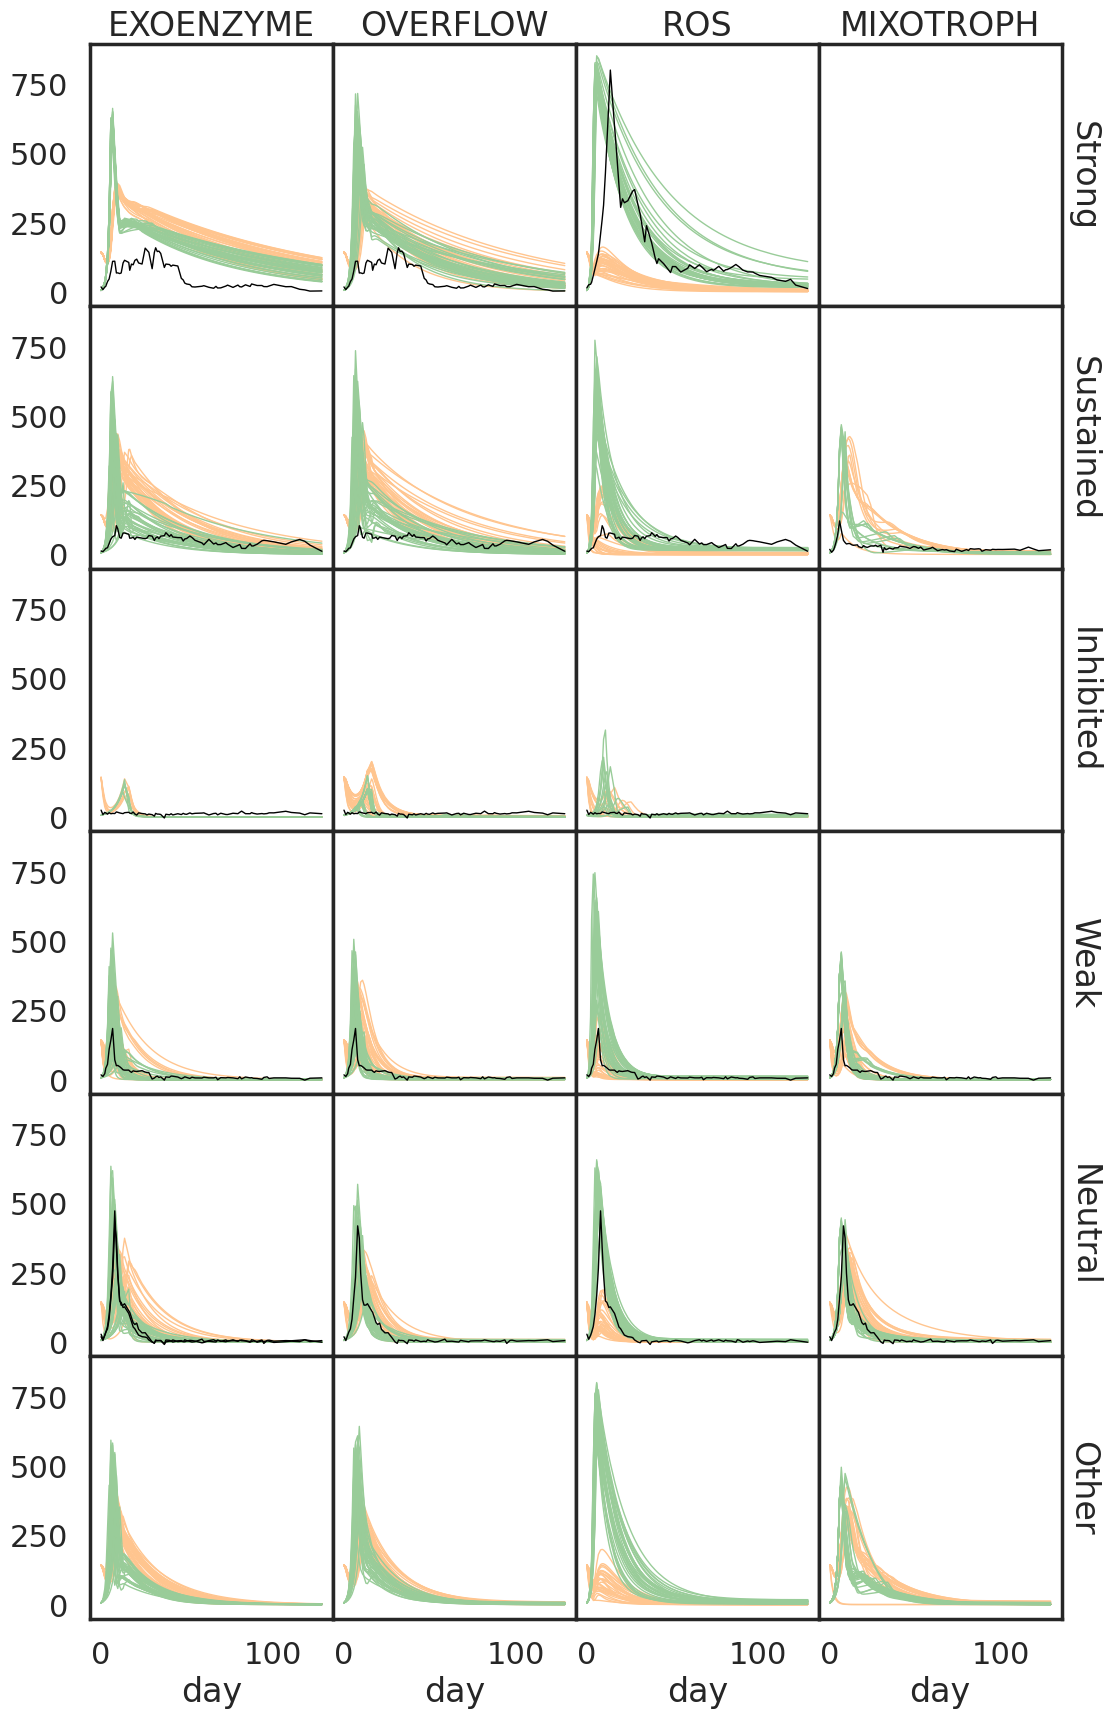

In [147]:
    g = sns.relplot(
        data=sample_df,
        kind='line', 
        estimator=None, units='run_id',
        #hue='model', palette=mpalette, hue_order=morder,
        #hue='max_prob',palette='Greens',
        color=PCOLOR,
        x='day', y=f'Bptotal[C]', lw=1, #alpha=0.5,
        row='y_pred',  row_order=gorder,
        col='model', col_order=morder,
        facet_kws=dict( margin_titles=True, despine=False),
        legend=False,
        hue_norm=(0.5,1.3),
        height=3, aspect=1,
    )
    for (row_val, col_val), ax in g.axes_dict.items():        
        data=sample_df.loc[
            sample_df.y_pred.isin([row_val]) &
            sample_df.model.isin([col_val]) 
        ]
        if data.shape[0]>0:
            sns.lineplot(
                data=data,
                estimator=None, units='run_id',
                #hue='model', palette=mpalette, hue_order=morder,
                #hue='max_prob', palette='Oranges',
                color=HCOLOR,
                x='day', y=f'Bhtotal[C]', lw=1,
                #alpha=0.5,
                legend=False,
                hue_norm=(0.5,1.3),
                
                zorder=-1,
                ax=ax,
            )
        ref_samples = set(data['Sample'].mode())
        
        if ref_samples:
            sns.lineplot(
                data=refdf.loc[refdf.Sample.isin(ref_samples)],
                estimator=None, units='Sample',
                x='day', y=f'ref_Bp[C]', lw=1,
                legend=False,
                color='black',
                #zorder=-1,
                ax=ax,
            )
            
    #g.set(yscale='log', ylim=(1e-1, 1000))
    #sns.despine(top=False, right=False, left=False, bottom=False)
    #g.set(ylim=(0, 150))
    plt.subplots_adjust(hspace=0, wspace=0)
            
    g.set(ylabel='C biomass (uM C)')
    g.set(ylabel='')
    g.set_titles(col_template='{col_name}', row_template='{row_name}')

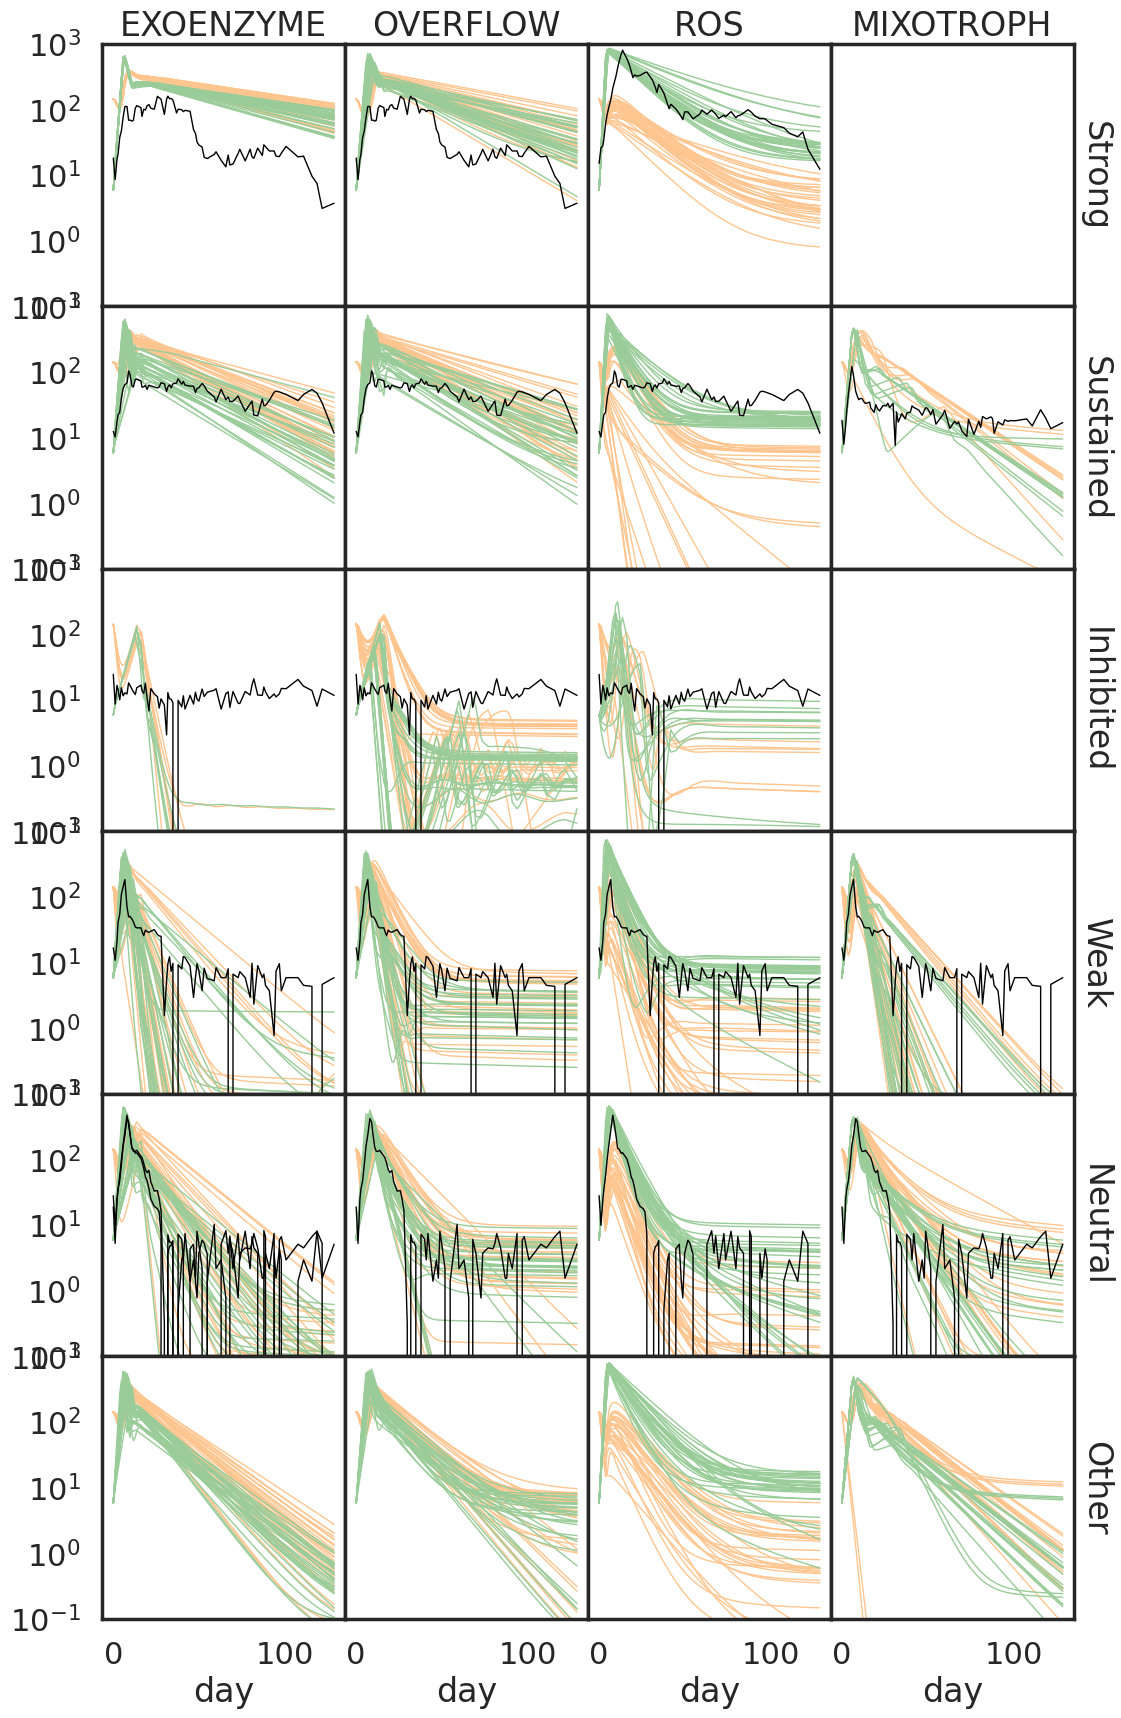

In [148]:
    g = sns.relplot(
        data=sample_df,
        kind='line', 
        estimator=None, units='run_id',
        #hue='model', palette=mpalette, hue_order=morder,
        #hue='max_prob',palette='Greens',
        color=PCOLOR,
        x='day', y=f'Bptotal[C]', lw=1, #alpha=0.5,
        row='y_pred',  row_order=gorder,
        col='model', col_order=morder,
        facet_kws=dict( margin_titles=True, despine=False),
        legend=False,
        hue_norm=(0.5,1.3),
        height=3, aspect=1,
    )
    for (row_val, col_val), ax in g.axes_dict.items():        
        data=sample_df.loc[
            sample_df.y_pred.isin([row_val]) &
            sample_df.model.isin([col_val]) 
        ]
        if data.shape[0]>0:
            sns.lineplot(
                data=data,
                estimator=None, units='run_id',
                #hue='model', palette=mpalette, hue_order=morder,
                #hue='max_prob', palette='Oranges',
                color=HCOLOR,
                x='day', y=f'Bhtotal[C]', lw=1,
                #alpha=0.5,
                legend=False,
                hue_norm=(0.5,1.3),
                
                zorder=-1,
                ax=ax,
            )
        ref_samples = set(data['Sample'].mode())
        
        if ref_samples:
            sns.lineplot(
                data=refdf.loc[refdf.Sample.isin(ref_samples)],
                estimator=None, units='Sample',
                x='day', y=f'ref_Bp[C]', lw=1,
                legend=False,
                color='black',
                #zorder=-1,
                ax=ax,
            )
            
    g.set(yscale='log', ylim=(1e-1, 1000))
    #sns.despine(top=False, right=False, left=False, bottom=False)
    #g.set(ylim=(0, 150))
    plt.subplots_adjust(hspace=0, wspace=0)
            
    g.set(ylabel='C biomass (uM C)')
    g.set(ylabel='')
    g.set_titles(col_template='{col_name}', row_template='{row_name}')

In [575]:
plt.show()

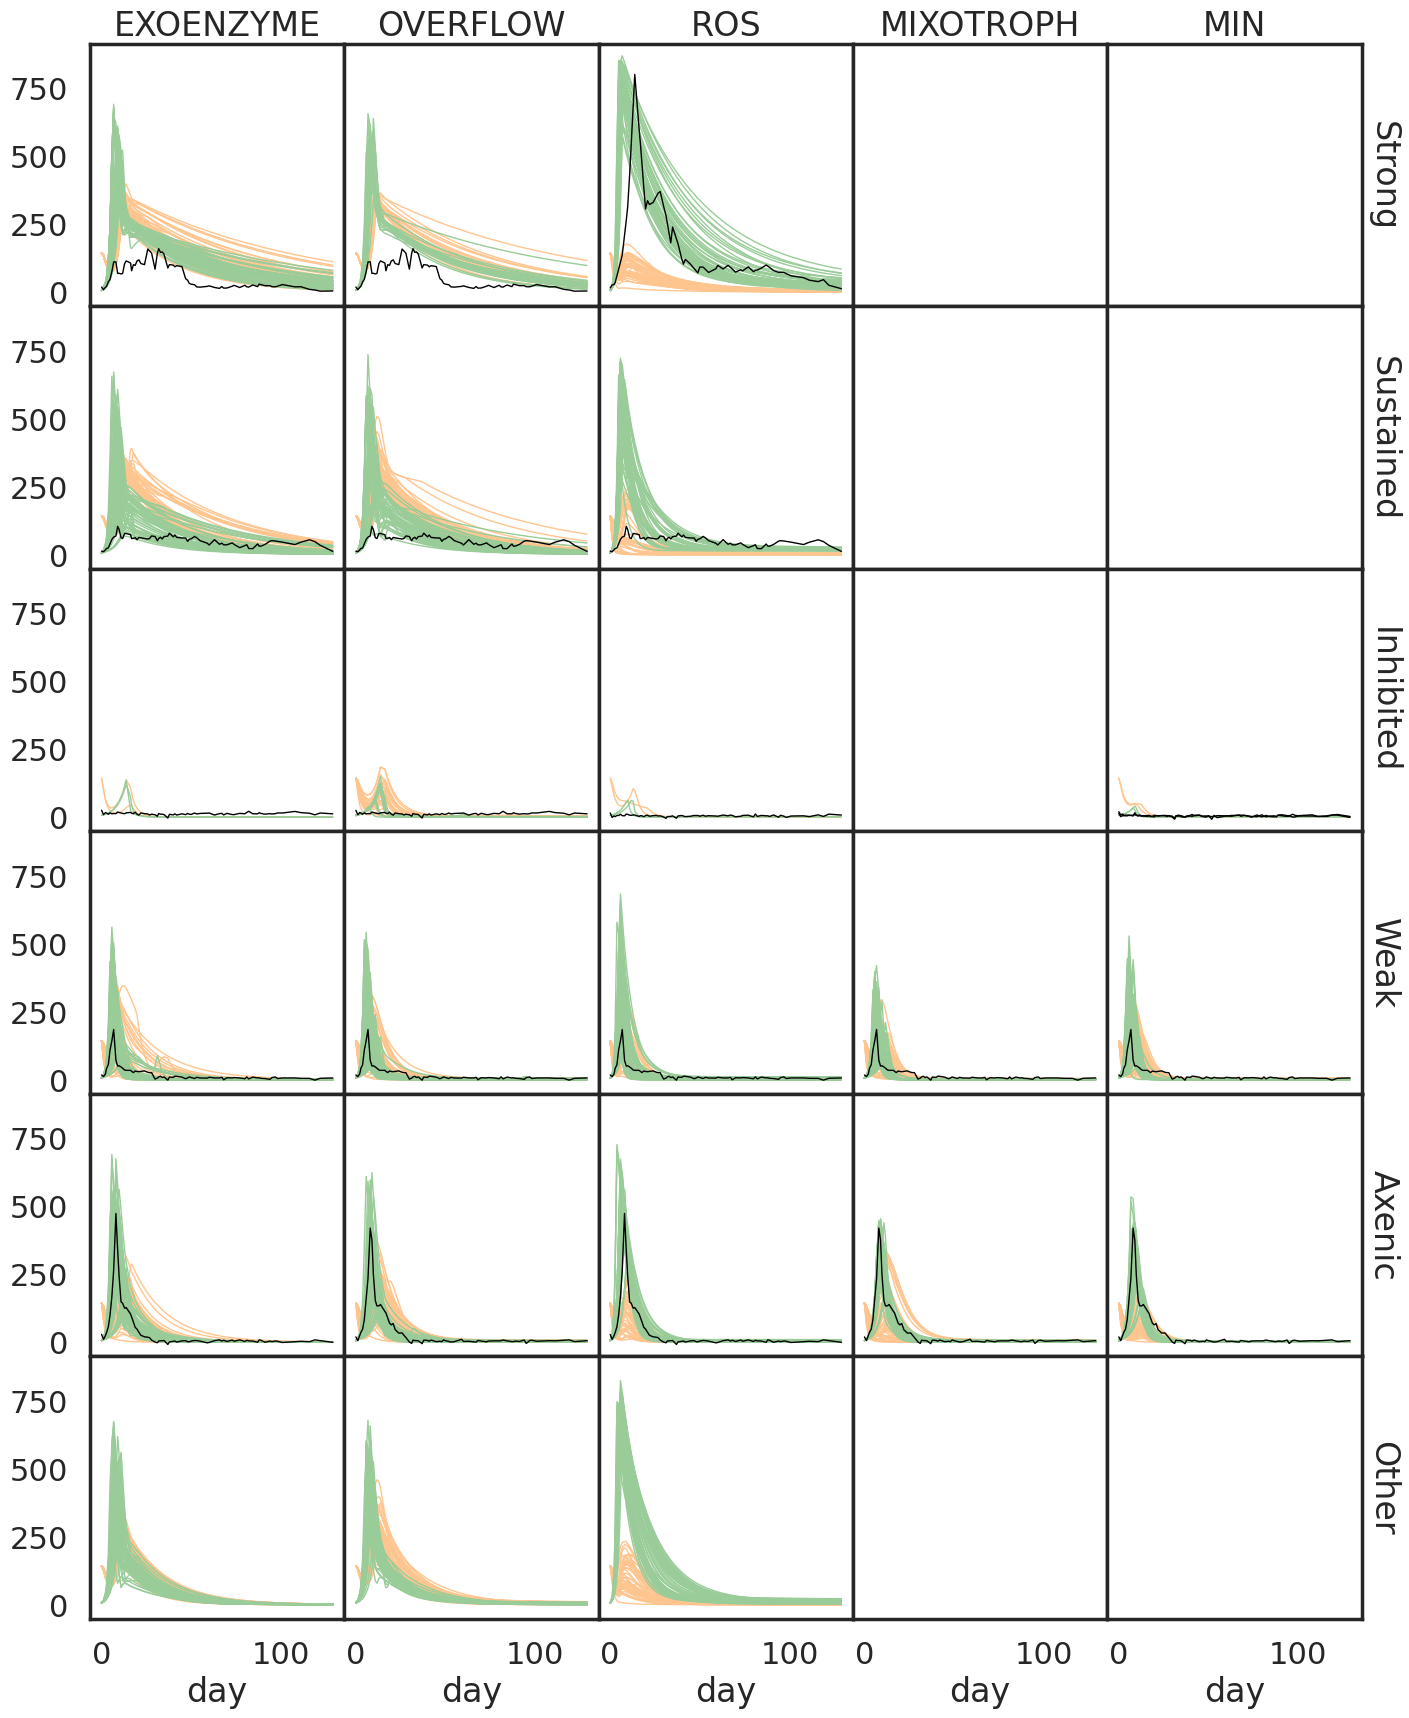

In [576]:
    g = sns.relplot(
        data=sample_df,
        kind='line', 
        estimator=None, units='run_id',
        #hue='model', palette=mpalette, hue_order=morder,
        #hue='max_prob', palette='Greens',
        color=PCOLOR,
        x='day', y=f'Bptotal[C]', lw=1, #alpha=0.5,
        row='y_pred',  row_order=gorder,
        col='model', col_order=morder,
        facet_kws=dict( margin_titles=True, despine=False),
        legend=False,
        hue_norm=(0.5,1.3),
        height=3, aspect=1,
    )
    for (row_val, col_val), ax in g.axes_dict.items():        
        data=sample_df.loc[
            sample_df.y_pred.isin([row_val]) &
            sample_df.model.isin([col_val]) 
        ]
        if data.shape[0]>0:
            sns.lineplot(
                data=data,
                estimator=None, units='run_id',
                #hue='model', palette=mpalette, hue_order=morder,
                #hue='max_prob', palette='Oranges',
                color=HCOLOR,
                
                x='day', y=f'Bhtotal[C]', lw=1,
                #alpha=0.5,
                legend=False,
                hue_norm=(0.5,1.3),
                
                zorder=-1,
                ax=ax,
            )
        ref_samples = set(data.loc[data.y_pred == data.Group, 'Sample'].mode())
        
        if ref_samples:
            sns.lineplot(
                data=refdf.loc[refdf.Sample.isin(ref_samples)],
                estimator=None, units='Sample',
                x='day', y=f'ref_Bp[C]', lw=1,
                legend=False,
                color='black',
                #zorder=-1,
                ax=ax,
            )
            
    #g.set(yscale='log', ylim=(1e-1, 150))
    #sns.despine(top=False, right=False, left=False, bottom=False)
    #g.set(ylim=(0, 150))
    plt.subplots_adjust(hspace=0, wspace=0)
            
    g.set(ylabel='C biomass (uM C)')
    g.set(ylabel='')
    g.set_titles(col_template='{col_name}', row_template='{row_name}')
    plt.show()

In [577]:
minmse_df.loc[minmse_df.y_pred == minmse_df.Group].pivot_table(index='model', columns='y_pred', values='RMSE', aggfunc=['count','mean', 'std'])

count                                             mean  \
y_pred      Axenic Inhibited  Strong Sustained     Weak      Axenic   
model                                                                 
EXOENZYME   9263.0       3.0   126.0    3760.0   4650.0  351.138922   
MIN         3291.0       2.0     NaN       NaN   6571.0  315.478505   
MIXOTROPH   4290.0       NaN     NaN       NaN   5569.0  290.788311   
OVERFLOW   14683.0      89.0    25.0     590.0  11192.0  304.923039   
ROS         2054.0      17.0  3097.0     155.0  10829.0  298.722616   

                                                                    std  \
y_pred      Inhibited       Strong    Sustained        Weak      Axenic   
model                                                                     
EXOENZYME   57.448546  1728.743484   804.972675  227.312587  217.916767   
MIN          2.176163          NaN          NaN  186.210131  199.005309   
MIXOTROPH         NaN          NaN          NaN  135.778545  227.534513   
OVERFLOW    42.201138  1724.224049   868.252143  191.985765  217.994831   
ROS        112.266460  3525.462752  1963.030248  247.125802  254.286787   

                                                           
y_pred      Inhibited      Strong   Sustained        Weak  
model                                                      
EXOENZYME    4.263596  273.223957  525.499006  181.934593  
MIN          1.049390         NaN         NaN  137.540155  
MIXOTROPH         NaN         NaN         NaN   92.947151  
OVERFLOW    11.114050  359.104301  438.764294  177.124555  
ROS        116.108278  589.103272  876.634884  283.743855

In [578]:
runids2 =minmse_df_good.loc[minmse_df_good.reset_index().groupby(['model', 'y_pred'])['max_prob'].idxmax(), 'run_id']

#runids2 = minmse_df.groupby(['model',  'y_pred', ])['run_id'].sample(1, replace=True)
sample_df2 = df.loc[df.run_id.isin(runids2)]


In [585]:
cccorder2 = ['Bptotal[C]', 'Bhtotal[C]', 'DOC',  'RDOC', ]
cccpalette2 = [PCOLOR,HCOLOR,  '#D65F59', '#FF8A83']
cccpalette22 = [PCOLOR_light,HCOLOR_light,  '#D65F59', '#FF8A83']
ccnorder1 = ['Bptotal[N]', 'Bhtotal[N]', 'DIN','DON',  'RDON', ]
#ccnpalette1 = ['#3A5A40', '#D4AF37',  '#262842', '#2C497F', '#8897BD']
#ccnpalette1 = ['#3A5A40', '#D4AF37',  '#4651a9', '#749BC2', '#91C8E4']
ccnpalette1 = [PCOLOR,HCOLOR,  '#4651a9', '#749BC2', '#91C8E4']
ccnpalette12 = [PCOLOR_light,HCOLOR_light,  '#4651a9', '#749BC2', '#91C8E4']
